#### Most basic implementations of stacked neural network with non-linear activation functions for XOR operations


In [2]:
import numpy as np
import pandas as pd

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv("..\data\simple_images_train.csv")

In [6]:
train.shape

(4000, 5)

In [7]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3'], dtype='object')

In [8]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3
0,checkerboard,200,52,58,199
1,triangle,213,17,211,244
2,bright line,254,98,242,135
3,triangle,207,234,240,26
4,triangle,222,213,223,8


In [9]:
import matplotlib.pyplot as plt

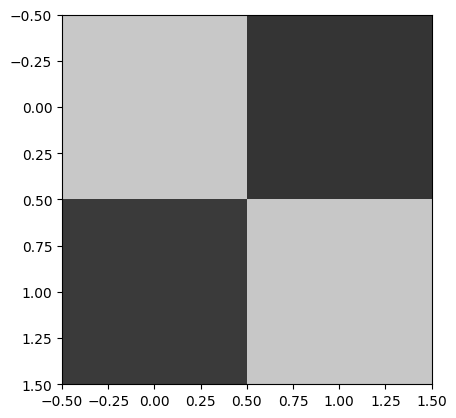

In [11]:
plt.imshow(train.drop(columns= 'label').to_numpy()[0].reshape(2,2), cmap= 'gray', vmin= 0, vmax= 255)

##### We have to do classification these three distinct classes
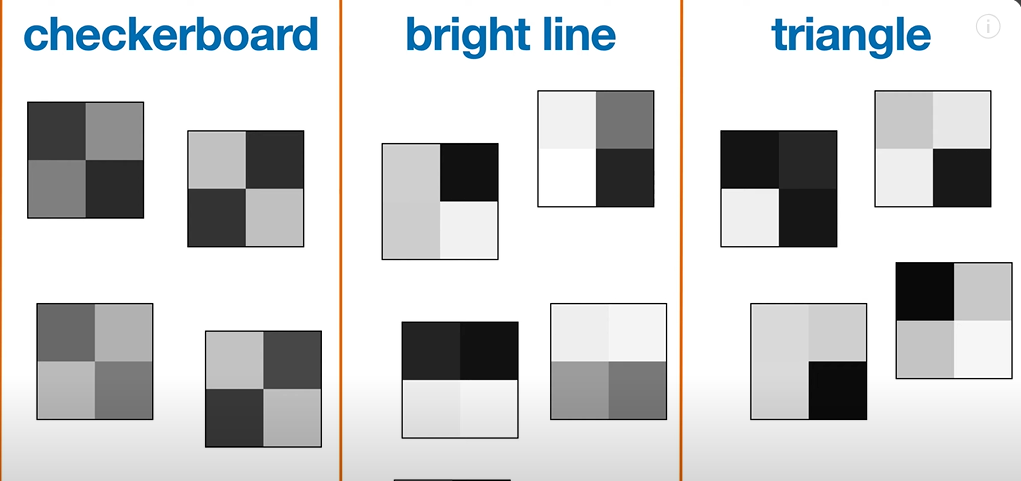

The possible neural network architecture for single-class classification is as follows:
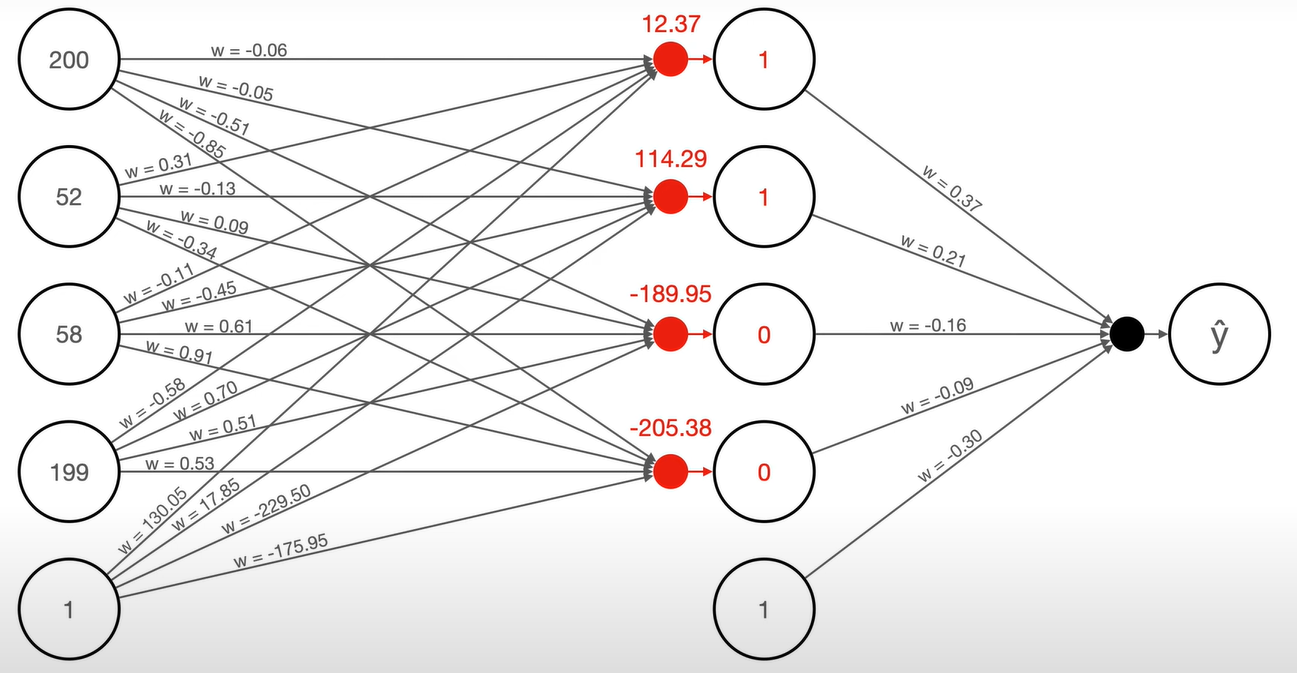

In [12]:
#=== Challenge ============================================================================================

class NNet():
    """
    My first neural network
    """

    def __init__(self, W1=None, W2=None, y_classes=None):
        """
        Initialization

        :param W1: optional weight matrix, W1 (2-D numpy array)
        :param W2: optional weight matrix, W2 (2-D numpy array)
        :param y_classes: optional array of y_classes (1-D numpy array with 2 elements)
        """

        self.W1 = W1
        self.W2 = W2
        self.y_classes = y_classes

    def fit(self, X, y, hiddenNodes, GUESSES=10_000, seed=None):
        """
        Randomly guess weights. Keep the best

        :param X: training features
        :param y: training labels. Should have exactly 2 classes
        :param hiddenNodes: How many hidden layer nodes to use, excluding bias node
        :param GUESSES: How many times to guess random weights
        :param seed: Optional random number seed
        :return: None. Update self.y_classes, self.W1, self.W2
        """

        # Validate X dimensionality
        if X.ndim != 2:
            raise AssertionError(f"X should have 2 dimensions but it has {X.ndim}")

        # Determine/validate y_classes
        y_classes = np.unique(y)
        if len(y_classes) != 2:
            AssertionError(f"y should have 2 distinct classes, but instead it has {len(y_classes)}")

        pass

    def predict(self, X):
        """
        Predict on X

        :param X: 2-D array with >= 1 column of real-valued features
        :return: 1-D array of predicted values
        """

        pass

In [19]:
"""
Implementing this method to handle learning of neural network using random weights generator over stopping criterion of iterations
"""

def heaviside(x):
    """
    Heaviside step function, except we set H = 0 where x = 0
    H(x) = 1 where x > 0, 0 otherwise

    :param x: numpy array of floats or integers
    :return: 1 where x > 0, 0 otherwise
    """

    return (x > 0).astype('int64')
def fit(self, X, y, hiddenNodes, GUESSES=10_000, seed=None):
    """
    Randomly guess weights. Keep the best

    :param X: training features
    :param y: training labels. Should have exactly 2 classes
    :param hiddenNodes: How many hidden layer nodes to use, excluding bias node
    :param GUESSES: How many times to guess random weights
    :param seed: Optional random number seed
    :return: None. Update self.y_classes, self.W1, self.W2
    """

    # Validate X dimensionality
    if X.ndim != 2:
        raise AssertionError(f"X should have 2 dimensions but it has {X.ndim}")

    # Determine/validate y_classes
    y_classes = np.unique(y)
    if len(y_classes) != 2:
        AssertionError(f"y should have 2 distinct classes, but instead it has {len(y_classes)}")

    # Convert y to 1-d array of {0, 1} where 0 represents class y_classes[0] and 1 represents y_classes[1]
    y01 = (y == y_classes[1]).astype('int64')

    # Initialization
    gen = np.random.default_rng(seed)
    X1 = np.insert(X, X.shape[1], 1, axis=1)
    best_W1 = None
    best_W2 = None
    best_accuracy = 0

    for i in range(GUESSES):

        # Guess W1 weights
        # If X has k columns (features) and the middle layer has m+1 nodes, W1 should have shape k+1 x m
        # In other words, the ith column of W1 corresponds to the ith perceptron. That is, the ith column
        # of W1 maps the input nodes to the ith node in the middle layer
        # We let the weights vary from [-1, 1], except the bias which we'll let vary from [-255 * k, 255 * k]
        W1 = gen.uniform(low=-1, high=1, size=(X.shape[1] + 1, hiddenNodes))
        W1[-1] *= (255 * X.shape[1])

        # Guess W2 weights
        W2 = gen.uniform(low=-1, high=1, size=(W1.shape[1] + 1, 1))

        # Make predictions (forward pass)
        Z1 = X1 @ W1
        X2 = np.insert(heaviside(Z1), obj=Z1.shape[1], values=1, axis=1)
        Z2 = X2 @ W2
        yhat = heaviside(Z2)[:, 0]

        # Calculate accuracy
        accuracy = np.mean(yhat == y01)

        # Check if best
        if accuracy > best_accuracy:
            best_W1 = W1
            best_W2 = W2
            best_accuracy = accuracy
            print(f'New best score: {best_accuracy}, iteration: {i}')

    # Update class vars
    self.y_classes = y_classes
    self.W1 = best_W1
    self.W2 = best_W2

In [20]:
NNet.fit = fit

In [21]:
def predict(self, X):
    """
    Predict on X

    :param X: 2-D array with >= 1 column of real-valued features
    :return: 1-D array of values from self.y_classes
    """

    if self.W1 is None:
        raise AssertionError(f"Need to fit() before predict()")
    if X.ndim != 2:
        raise AssertionError(f"X should have 2 dimensions but it has {X.ndim}")
    if X.shape[1] != len(self.W1) - 1:
        raise AssertionError(f"Perceptron was fit on X with {len(self.W1) - 1} columns but this X has {X.shape[1]} columns")

    X1 = np.insert(X, obj=X.shape[1], values=1, axis=1)
    Z1 = X1 @ self.W1
    X2 = np.insert(heaviside(Z1), obj=Z1.shape[1], values=1, axis=1)
    Z2 = X2 @ self.W2
    yhat = heaviside(Z2)[:, 0]
    preds = self.y_classes[yhat]

    return preds

In [22]:
NNet.predict = predict

In [26]:
# Initialize & fit neural network
nn = NNet()
nn.fit(
    X = train.drop(columns='label').to_numpy(),
    y = (train.label == 'checkerboard').to_numpy(),
    hiddenNodes = 4,
    GUESSES = 10_000,
    seed = 123
)



New best score: 0.62975, iteration: 0
New best score: 0.637, iteration: 43
New best score: 0.68, iteration: 94
New best score: 0.68475, iteration: 956
New best score: 0.71675, iteration: 2312
New best score: 0.71775, iteration: 2464
New best score: 0.7215, iteration: 2672


In [27]:
test = pd.read_csv('..\data\simple_images_test.csv')

In [28]:
# Evaluate on test data
preds = nn.predict(X = test.drop(columns='label').to_numpy())
(preds == (test.label == 'checkerboard')).mean()

0.705